# This notebook will plot the z-scored pop-coupling (PCZ) matrix (cells x visual stimuli) for a given experiment container id. It'll also calculate the invariance in dex of this matrix.

#MSarvestani, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint

import pop_coupling



:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Load data for a sample container (3 recording sessions across the same cells) from Allen Institute SDK

In [2]:
# To learn how to interact with Allen SDK, look at the notebooks here:
# https://alleninstitute.github.io/AllenSDK/brain_observatory.html

#get the brain obseratory cache (BOC)
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
#alternatively, if you've already downloaded the obseratory caceh and NWB files, enter manifest path below and uncomment
#boc = BrainObservatoryCache(manifest_file=manifest_path) #manifest_path is the path for manifest.json file

# This class uses a 'manifest' to keep track of downloaded data and metadata.  
# All downloaded files will be stored relative to the directory holding the manifest
# file.  If 'manifest_file' is a relative path (as it is below), it will be 
# saved relative to your working directory.  It can also be an absolute path.
boc = BrainObservatoryCache(manifest_file='boc/manifest.json')


#need to go from a container id to results-file, which means in eed structure id, cre-line
def get_info_from_id(boc,container_id):
    container_id_info=boc.get_experiment_containers(ids=[container_id])[0]
    struct= str(container_id_info['targeted_structure'])
    cre_line = str(container_id_info['cre_line'])
    return struct, cre_line
                     
                     
container_id =511510758 
structure_id, cre_line = get_info_from_id(boc,container_id)

exps = boc.get_ophys_experiments(experiment_container_ids=[container_id])
print("Experiments for experiment_container_id %d: %d\n" % (container_id, len(exps)))
pprint.pprint(exps)




Experiments for experiment_container_id 511510758: 3

[{'age_days': 86.0,
  'cre_line': u'Rbp4-Cre_KL100',
  'donor_name': u'233442',
  'experiment_container_id': 511510758,
  'id': 509881188,
  'imaging_depth': 375,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-233442',
  'targeted_structure': u'VISp'},
 {'age_days': 86.0,
  'cre_line': u'Rbp4-Cre_KL100',
  'donor_name': u'233442',
  'experiment_container_id': 511510758,
  'id': 509600709,
  'imaging_depth': 375,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-233442',
  'targeted_structure': u'VISp'},
 {'age_days': 86.0,
  'cre_line': u'Rbp4-Cre_KL100',
  'donor_name': u'233442',
  'experiment_container_id': 511510758,
  'id': 509523145,
  'imaging_depth': 375,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C',
  'specimen_name': u'Rbp4-Cre;Camk2a-tT

# Calculate the z-scored population coupling matrix (cellsxvisual stim)

In [3]:
# get_matrices_all does the following:
# gets the data files (neuropill corrected fluorescence traces) for these 3 sessions.
# calculates the PCZ of all cells for each stimuli in each session, then combines these to make a big PCZ matrix

trace_type = 'corrected'
pcz_mat = pop_coupling.get_matrices_all(boc, container_id,trace_type)

drifting_gratings_1
<type 'int'>
Experiment container info:
[{'imaging_depth': 375, 'donor_name': u'233442', 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-233442', 'id': 511510758, 'age_days': 86.0}]
natural_movie_three_1
<type 'int'>
Experiment container info:
[{'imaging_depth': 375, 'donor_name': u'233442', 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-233442', 'id': 511510758, 'age_days': 86.0}]
natural_movie_one
<type 'int'>
Experiment container info:
[{'imaging_depth': 375, 'donor_name': u'233442', 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-233442', 'id': 511510758, 'age_days': 86.0}]
drifting_gratings_2
<type 'int'>
Experiment container info:
[{'imaging_depth': 375, 'donor_name': u'

# Plot the matrix

C:\Users\Madineh\Anaconda\lib\site-packages\matplotlib\text.py:2138: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


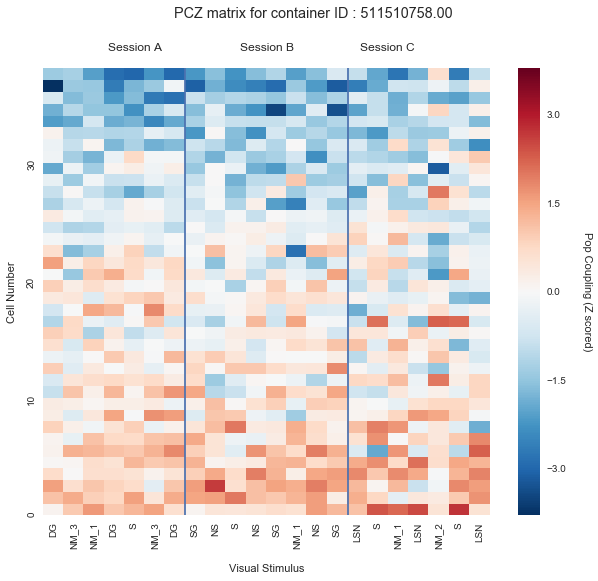

In [5]:
pop_coupling.plot_pcz_matrix(pcz_mat,container_id)

# Find the upper and lower bound PCZ matrices and calculate invariance index

In [25]:

#sort the PCZ matrix by mean PCZ (so it looks like plot above)
mean_pcz = np.mean(pcz_mat, axis=1)
sort_ind = np.argsort(mean_pcz)
pcz_mat = pcz_mat[sort_ind, :]


num_cells = np.shape(pcz_mat)[0]
num_stims = np.shape(pcz_mat)[1]

#get the upper bound of invariance index (maximum similarity of PCZ rank-order across stimuli) 
# by sorting each column (shared stim) separately - this will redue cell variance
pcz_mat_ub = np.copy(pcz_mat)
for i in range(num_stims):
    sort_order = np.argsort(pcz_mat[:,i])
    pcz_mat_ub[:,i] = pcz_mat[sort_order,i]
    
#get the lower bound of invariance index by sorting each column (shared stim) separately - this will redue cell variance
pcz_mat_lb = np.copy(pcz_mat)
for i in range(num_stims):
    rand_order = np.random.permutation(num_cells)
    pcz_mat_lb[:,i] = pcz_mat[rand_order,i]
        
# We can now calculate invariance using the relative distance of a PCZ matrix to the Lower bound PCZ matrix and the upper bound PCZ matrix\
Aflat = pcz_mat.flatten()
LBflat = pcz_mat_lb.flatten()
UBflat = pcz_mat_ub.flatten()

def euclidean_dist(A,B):
    return np.sqrt(np.sum((A-B)**2))

dist_lb = euclidean_dist(Aflat,LBflat)
dist_ub = euclidean_dist( Aflat, UBflat )
index= (dist_lb)/(dist_lb+dist_ub)
print ('Invariance Index is :' +str(index))


Invariance Index is :0.644572063057


# Plot the fluorescence trace of a sample soloist and chorister 

<type 'int'>
Experiment container info:
[{'imaging_depth': 375, 'donor_name': u'233442', 'reporter_line': u'Ai93(TITL-GCaMP6f)', 'targeted_structure': u'VISp', 'cre_line': u'Rbp4-Cre_KL100', 'specimen_name': u'Rbp4-Cre;Camk2a-tTA;Ai93-233442', 'id': 511510758, 'age_days': 86.0}]


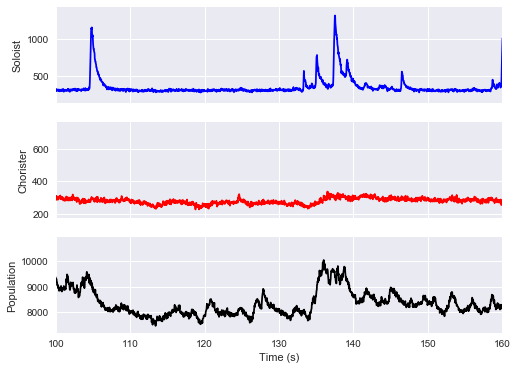

In [12]:
# Find the index of a solist and a chorister
stim_names_A=['drifting_gratings_1', 'natural_movie_three_1','natural_movie_one','drifting_gratings_2',
             'spontaneous_1','natural_movie_three_2','drifting_gratings_3']

stim_id=5 #pick the index of a stimulis from list above
    
soloist_ind=np.argmin(pcz_mat[:,stim_id])
chorister_ind=np.argmax(pcz_mat[:,stim_id])

# now get the activity matrix to plot a sample soloist and chorister
session_idx=0
stim_type=stim_names_A[stim_id]
trace_type='corrected'
activity_matrix, stable_specimen_indices, stable_specimen_ids=pop_coupling.get_activity_matrix(boc, container_id, session_idx, stim_type, trace_type)
activity_matrix2=activity_matrix[:,stable_specimen_indices]


# now plot a sample solist and chorister traes
num_cells=np.shape(pcz_mat)[0]
population_ind=np.setxor1d(range(0,num_cells,1),[soloist_ind,chorister_ind])
soloist_cell=activity_matrix2[:,soloist_ind]
chorister_cell=activity_matrix2[:,chorister_ind]
population=np.sum(activity_matrix2[:,population_ind],axis=1)
t=(1./30)*np.array(range(0,len(soloist_cell),1))


fig, ax = plt.subplots(3, 1, figsize=(8,6),sharex=True)
axs=ax.ravel()
axs[0].plot(t,soloist_cell, 'b')
axs[1].plot(t,chorister_cell,'r')
axs[2].plot(t,population,'k')
axs[0].set_ylabel('Soloist')
axs[1].set_ylabel('Chorister')
axs[2].set_ylabel('Population')
axs[2].set_xlabel('Time (s)')
axs[2].set_xlim([100,160])
plt.show()